# Machine Learning for Neuroimaging 

## Hands on Statistics & ML (Python) - 10/19/2023
### Part 1: Data Preparation and Hypothesis Testing

In [1]:
import numpy as np # matrices and mathematics
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Plots
import seaborn as sns # Plots
from scipy.stats import mannwhitneyu # Mann-Whitney U-test
from scipy.stats import chi2_contingency # Chi-squared test
import statsmodels.api as sm # Statistical models

## Autism Screening on Adults

Autism, or autism spectrum disorder (ASD), refers to a broad range of conditions characterized by challenges with social skills, repetitive behaviors, speech and nonverbal communication.

This dataset is composed of survey results for more than 700 subjects who filled an app form containing a quick referral guide for adults with suspected autism who do not have a learning disability. Their labels (Control vs. ASD) portray whether the subjects received a diagnosis of autism, based on the [AQ-10 Autism Spectrum Quotient (AQ) NHS Questionnaire](https://docs.autismresearchcentre.com/tests/AQ10.pdf) and were refered to a specialist for further diagnostic assessment.

[Download dataset from Kaggle](https://www.kaggle.com/datasets/andrewmvd/autism-screening-on-adults?resource=download)

[Dataset Website](https://archive.ics.uci.edu/ml/datasets/Autism+Screening+Adult#)

- Thabtah, Fadi. "An accessible and efficient autism screening method for behavioural data and predictive analyses." Health informatics journal 25.4 (2019): 1739-1755.

- Allison, Carrie, Bonnie Auyeung, and Simon Baron-Cohen. "Toward brief “red flags” for autism screening: the short autism spectrum quotient and the short quantitative checklist in 1,000 cases and 3,000 controls." Journal of the American Academy of Child & Adolescent Psychiatry 51.2 (2012): 202-212.

| Feature      | Description |
| ----------- | ----------- |
| index      | Participant ID       |
| AX_Score   | Score based on the Autism Spectrum Quotient (AQ) 10 item screening tool AQ-10        |
| age   | Age in years        |
| gender   | Participant gender        |
| ethnicity   | Ethnicities in text form        |
| jaundice   | Whether or not the participant was born with jaundice       |
| austim(typo in the original csv) | Whether or not anyone in the immediate family has been diagnosed with autism |
| country_of_res | Country of residency |
| used_app_before | Whether the participant has used a screening app |
| result | Score from the AQ-10 screening tool (sum of positive categories) |
| age_desc | Age as categorical variable |
| relation | Relation of person who completed the test |
| Class/ASD | Participant classification to control vs ASD |

In [2]:
# Parameters for the size/resolution of plots
%matplotlib inline
a4_dims = (9.7, 3.27)
plt.rcParams['figure.dpi'] = 500
plt.rcParams['savefig.dpi'] = 500
plt.rcParams["figure.autolayout"] = True

## Data Loading

In [3]:
# Read csv dataset
dataframe = pd.read_csv('data/autism_screening.csv')

# Print the first 5 rows of our dataset
dataframe.head(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


## Data Preparation
### See Tutorial-1-Python-ML for more details

In [4]:
# Remove rows with outlier from the data
outlier_row = dataframe.loc[dataframe['age']==383]
dataframe.drop(outlier_row.index, inplace=True)

# Describe returns information about the numerical columns of our dataset
dataframe.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,701.000000,703.000000
mean,0.721195,0.453770,0.458037,0.496444,0.499289,0.284495,0.418208,0.650071,0.324324,0.574680,29.194009,4.880512
std,0.448731,0.498213,0.498591,0.500343,0.500355,0.451495,0.493616,0.477287,0.468455,0.494743,9.711526,2.498992
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000,10.000000


In [5]:
# Check how many values are missing per column
missing_values_before = dataframe.isnull().sum().sum()

# Dealing with Missing Values
dataframe = dataframe.replace({'?':np.NaN})

# Fill out missing age values with mean age - Continuous value
dataframe['age'] = dataframe['age'].fillna(np.round(dataframe['age'].mean(), 0))

# Replace missing ethnicities and relations with 'Other' as we do not know the actual category
dataframe = dataframe.replace({np.NaN:'Other'})
missing_values_after = dataframe.isnull().sum().sum()
print(f"Before, there were {missing_values_before} missing values. Now, there are {missing_values_after}")

Before, there were 2 missing values. Now, there are 0


## Hypothesis Testing - Age of cohorts

Text(0.5, 0, 'Age')

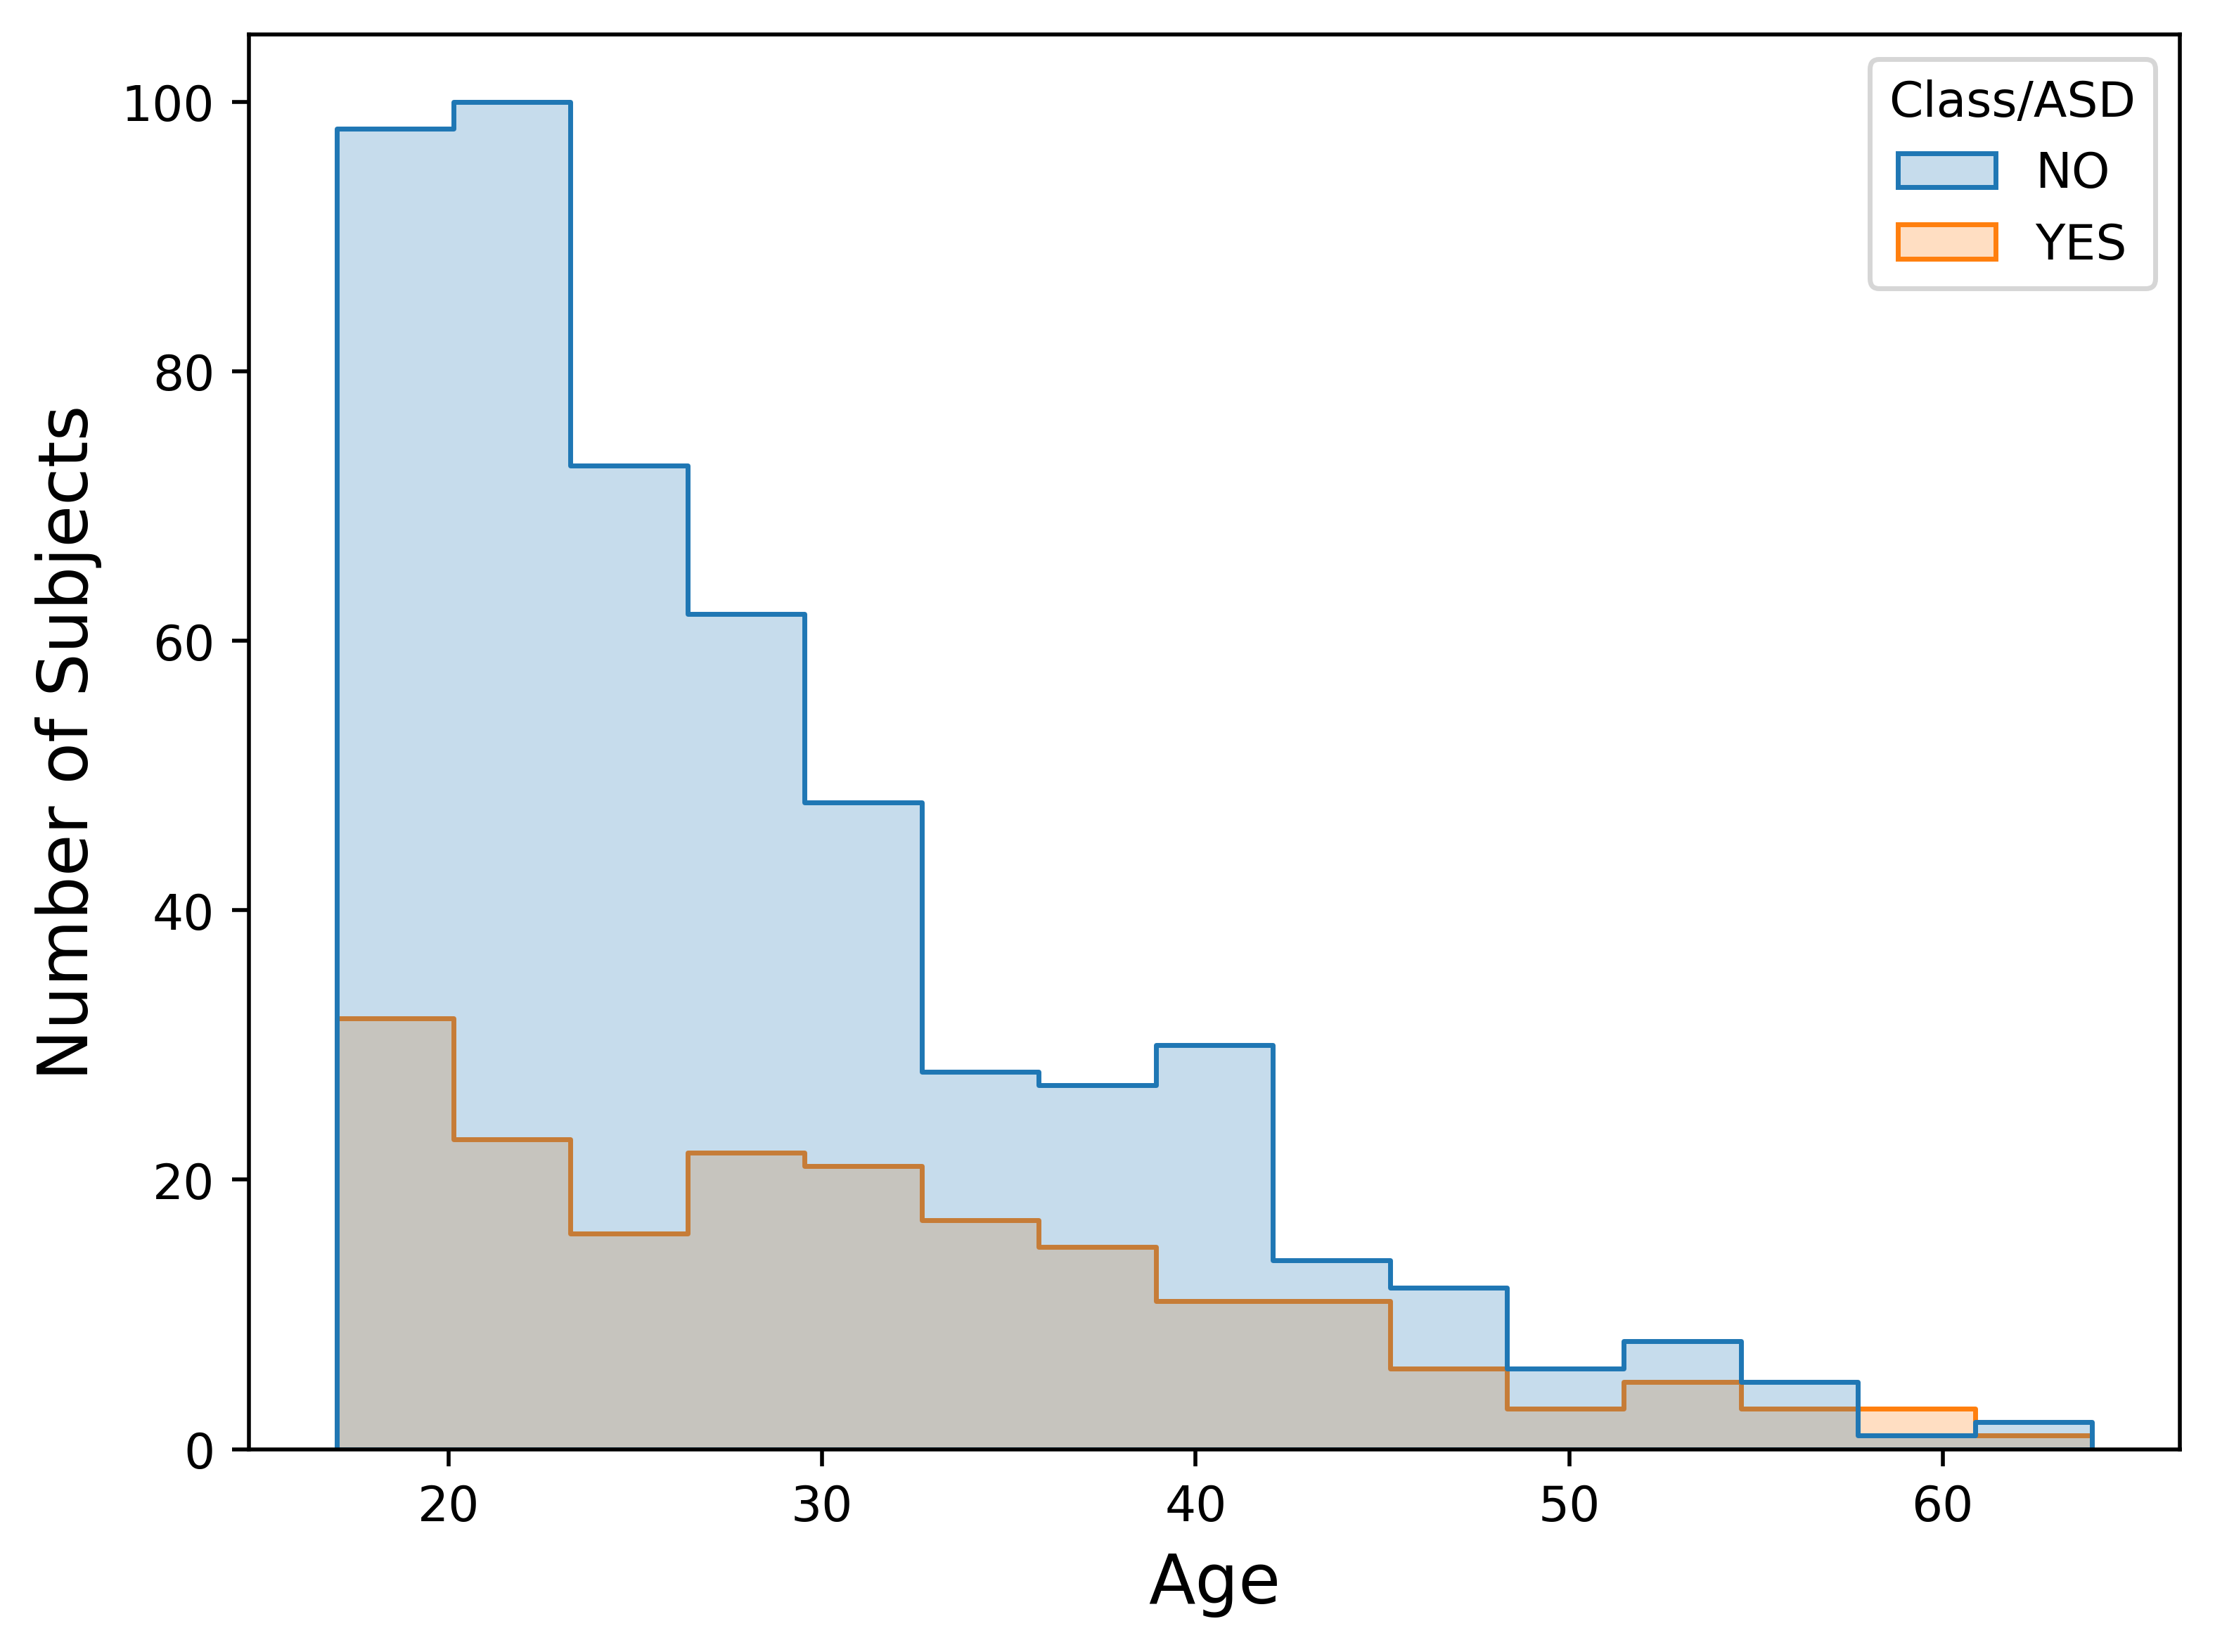

In [6]:
# Get dataframes for controls and positive subjects after data pre-processing
controls = dataframe[dataframe['Class/ASD']=='NO']
autism = dataframe[dataframe['Class/ASD'] == 'YES']

plt.figure()
ax1 = sns.histplot(x="age", data=dataframe, hue="Class/ASD", element="step")
ax1.set_ylabel("Number of Subjects", fontsize = 14)
ax1.set_xlabel("Age", fontsize = 14)

# How would you compare the two cohorts and why?

## *Null hypothesis*: the age distribution of the two cohorts is equal


## Mann-Whitney U-Test
Tests whether the distributions of two independent samples are equal or not

## Assumptions
- Observations in each sample are independent and identically distributed (iid)
- Observations in each sample can be ranked.

In [7]:
U1, p = mannwhitneyu(controls["age"], autism["age"])

print("Null hypothesis: the age distribution of the two cohorts is equal.")
print(f'p-value with Mann-Whitney U-test: {p:.4f}')
print("p<0.05 --> we reject the null hypothesis.")

Null hypothesis: the age distribution of the two cohorts is equal.
p-value with Mann-Whitney U-test: 0.0012
p<0.05 --> we reject the null hypothesis.


Text(0.03, 0.93, 'p=0.001')

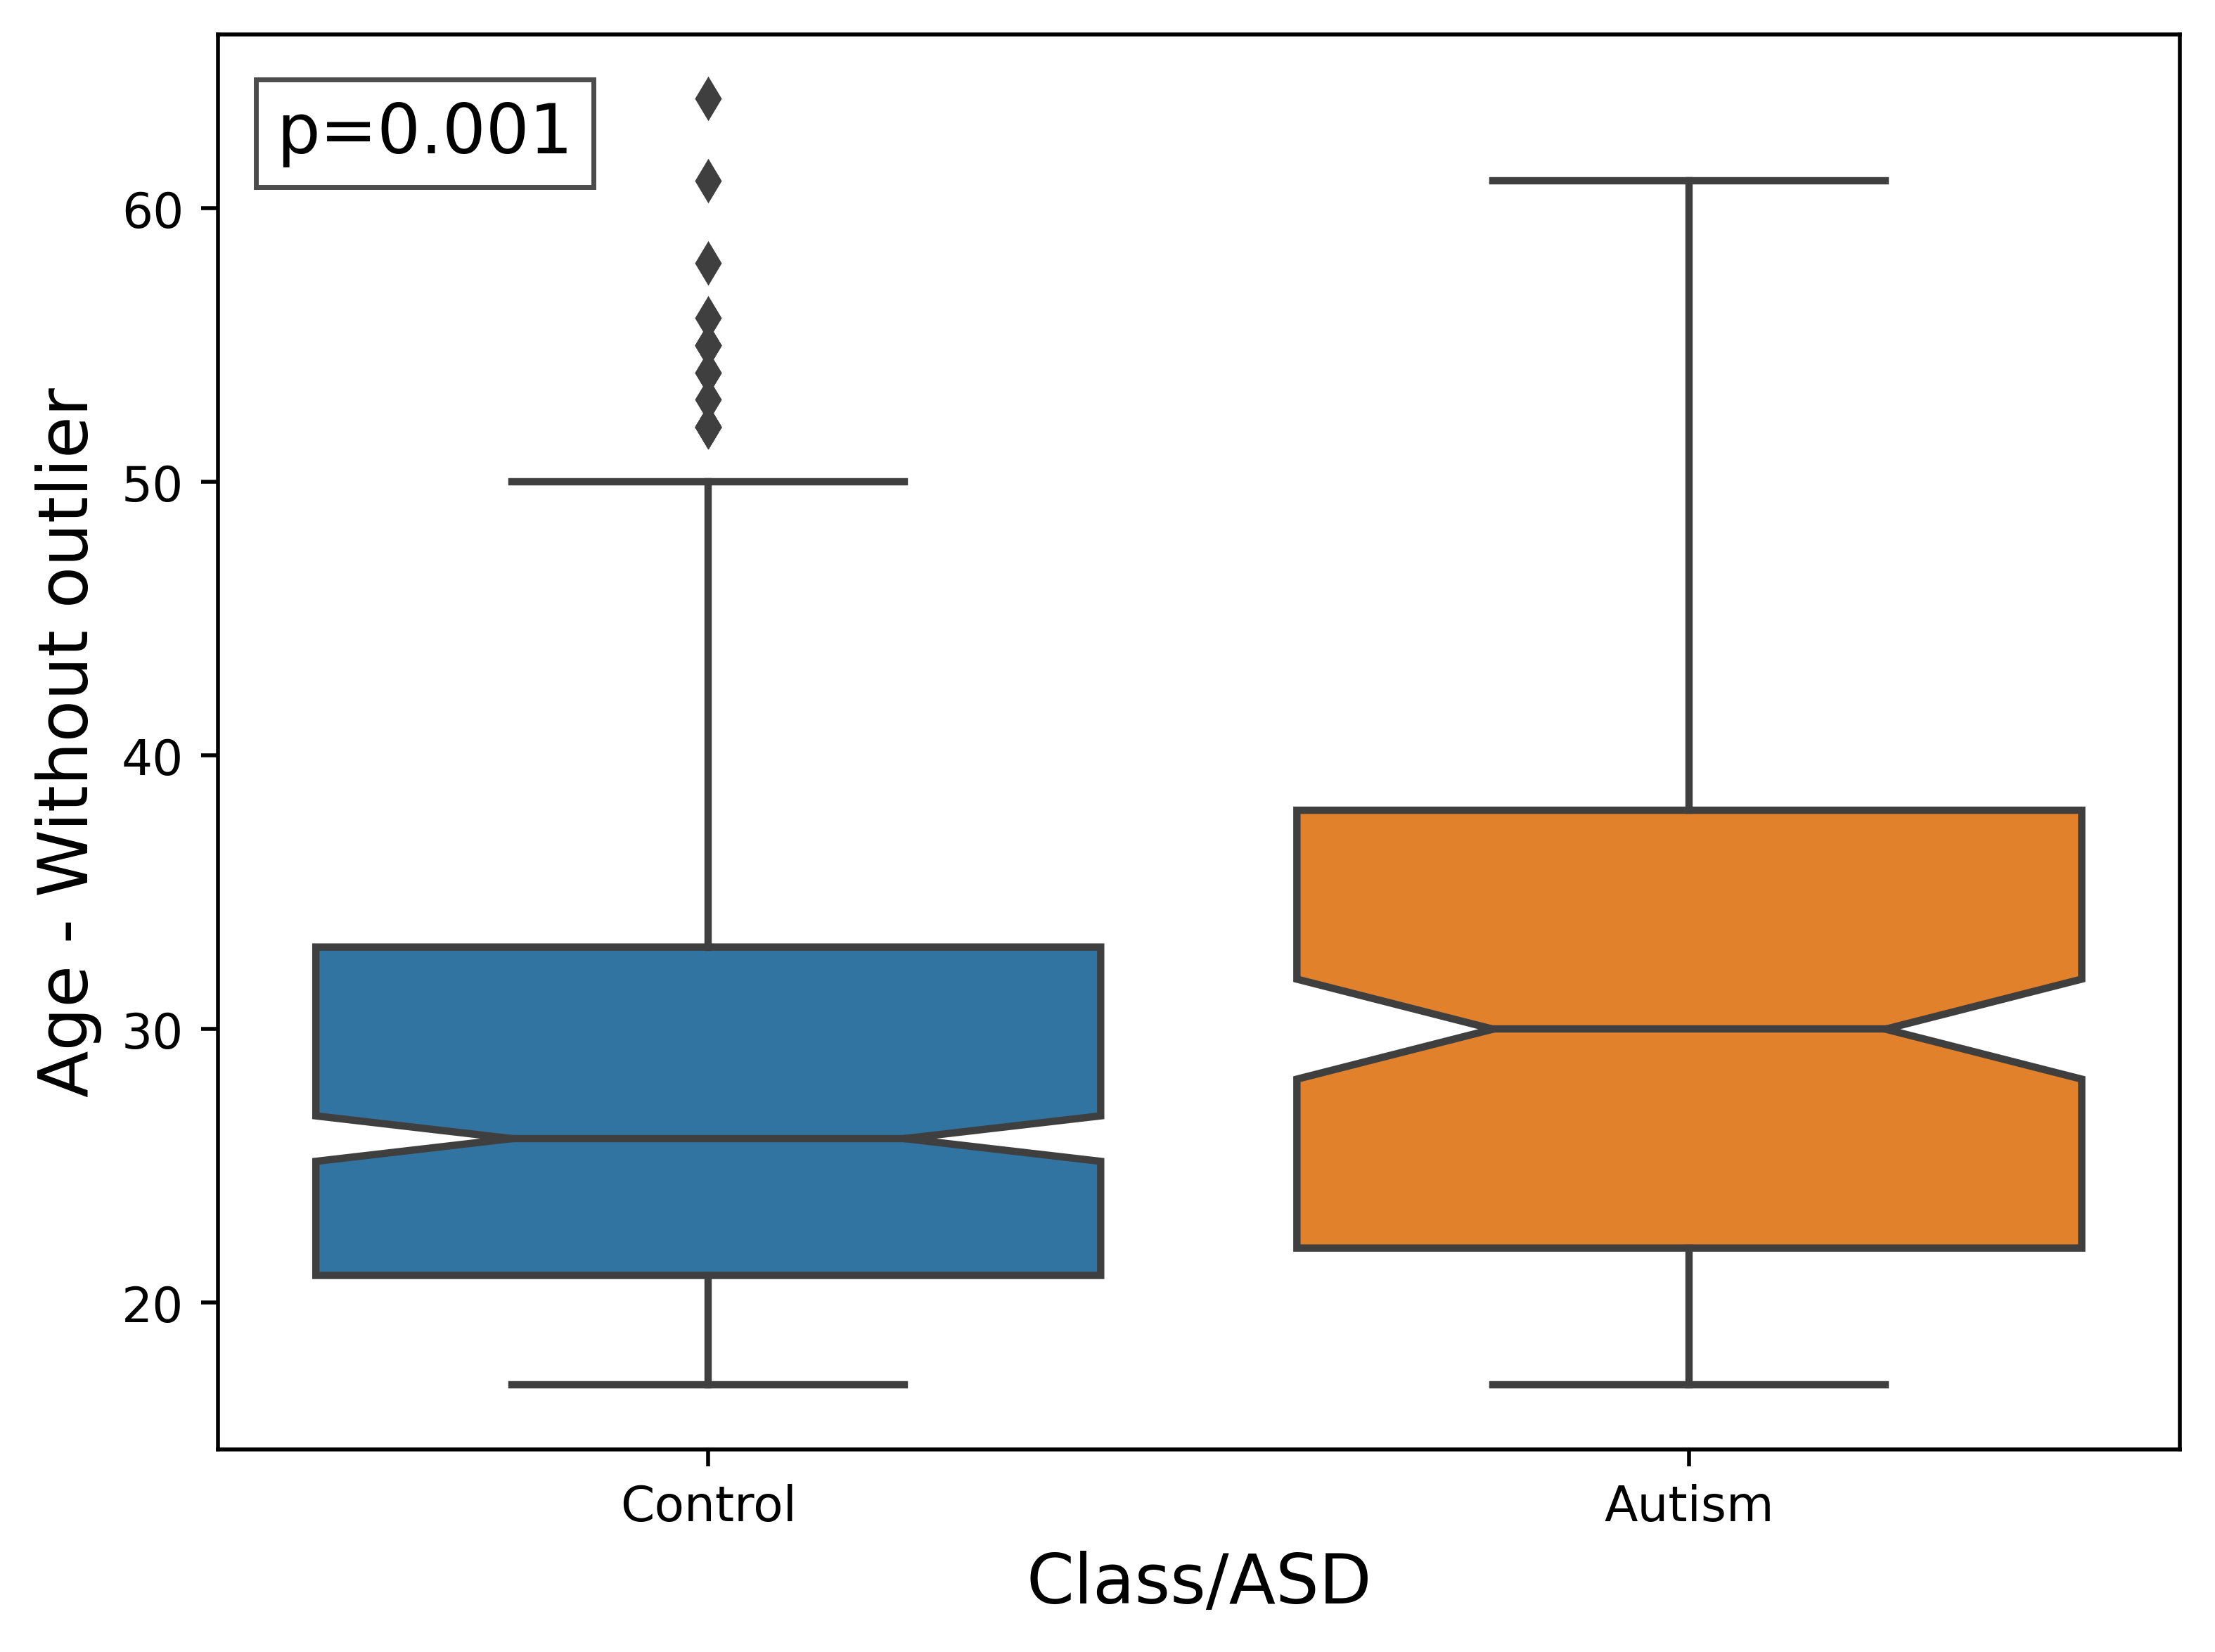

In [8]:
plt.figure()
ax1 = sns.boxplot(x="Class/ASD", y="age", data=dataframe, notch=True)
ax1.set_ylabel("Age - Without outlier", fontsize = 14)
ax1.set_xlabel("Class/ASD", fontsize = 14)
ax1.set_xticklabels(["Control", "Autism"])
right = (0.03, 0.93)
ax1.annotate(f'p={p:.3f}', xy=right, xycoords='axes fraction', ha='left', va='center', fontsize='14', 
                bbox={'boxstyle': 'square', 'fc': 'white', 'ec': 'black', 'alpha': 0.7})

# Notice the notches of the boxplot!
# Since the notches in the box plot do not overlap, we can conclude, with 95% confidence, 
# that the true medians do differ.

## Hypothesis Testing - Frequences of sexes

[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

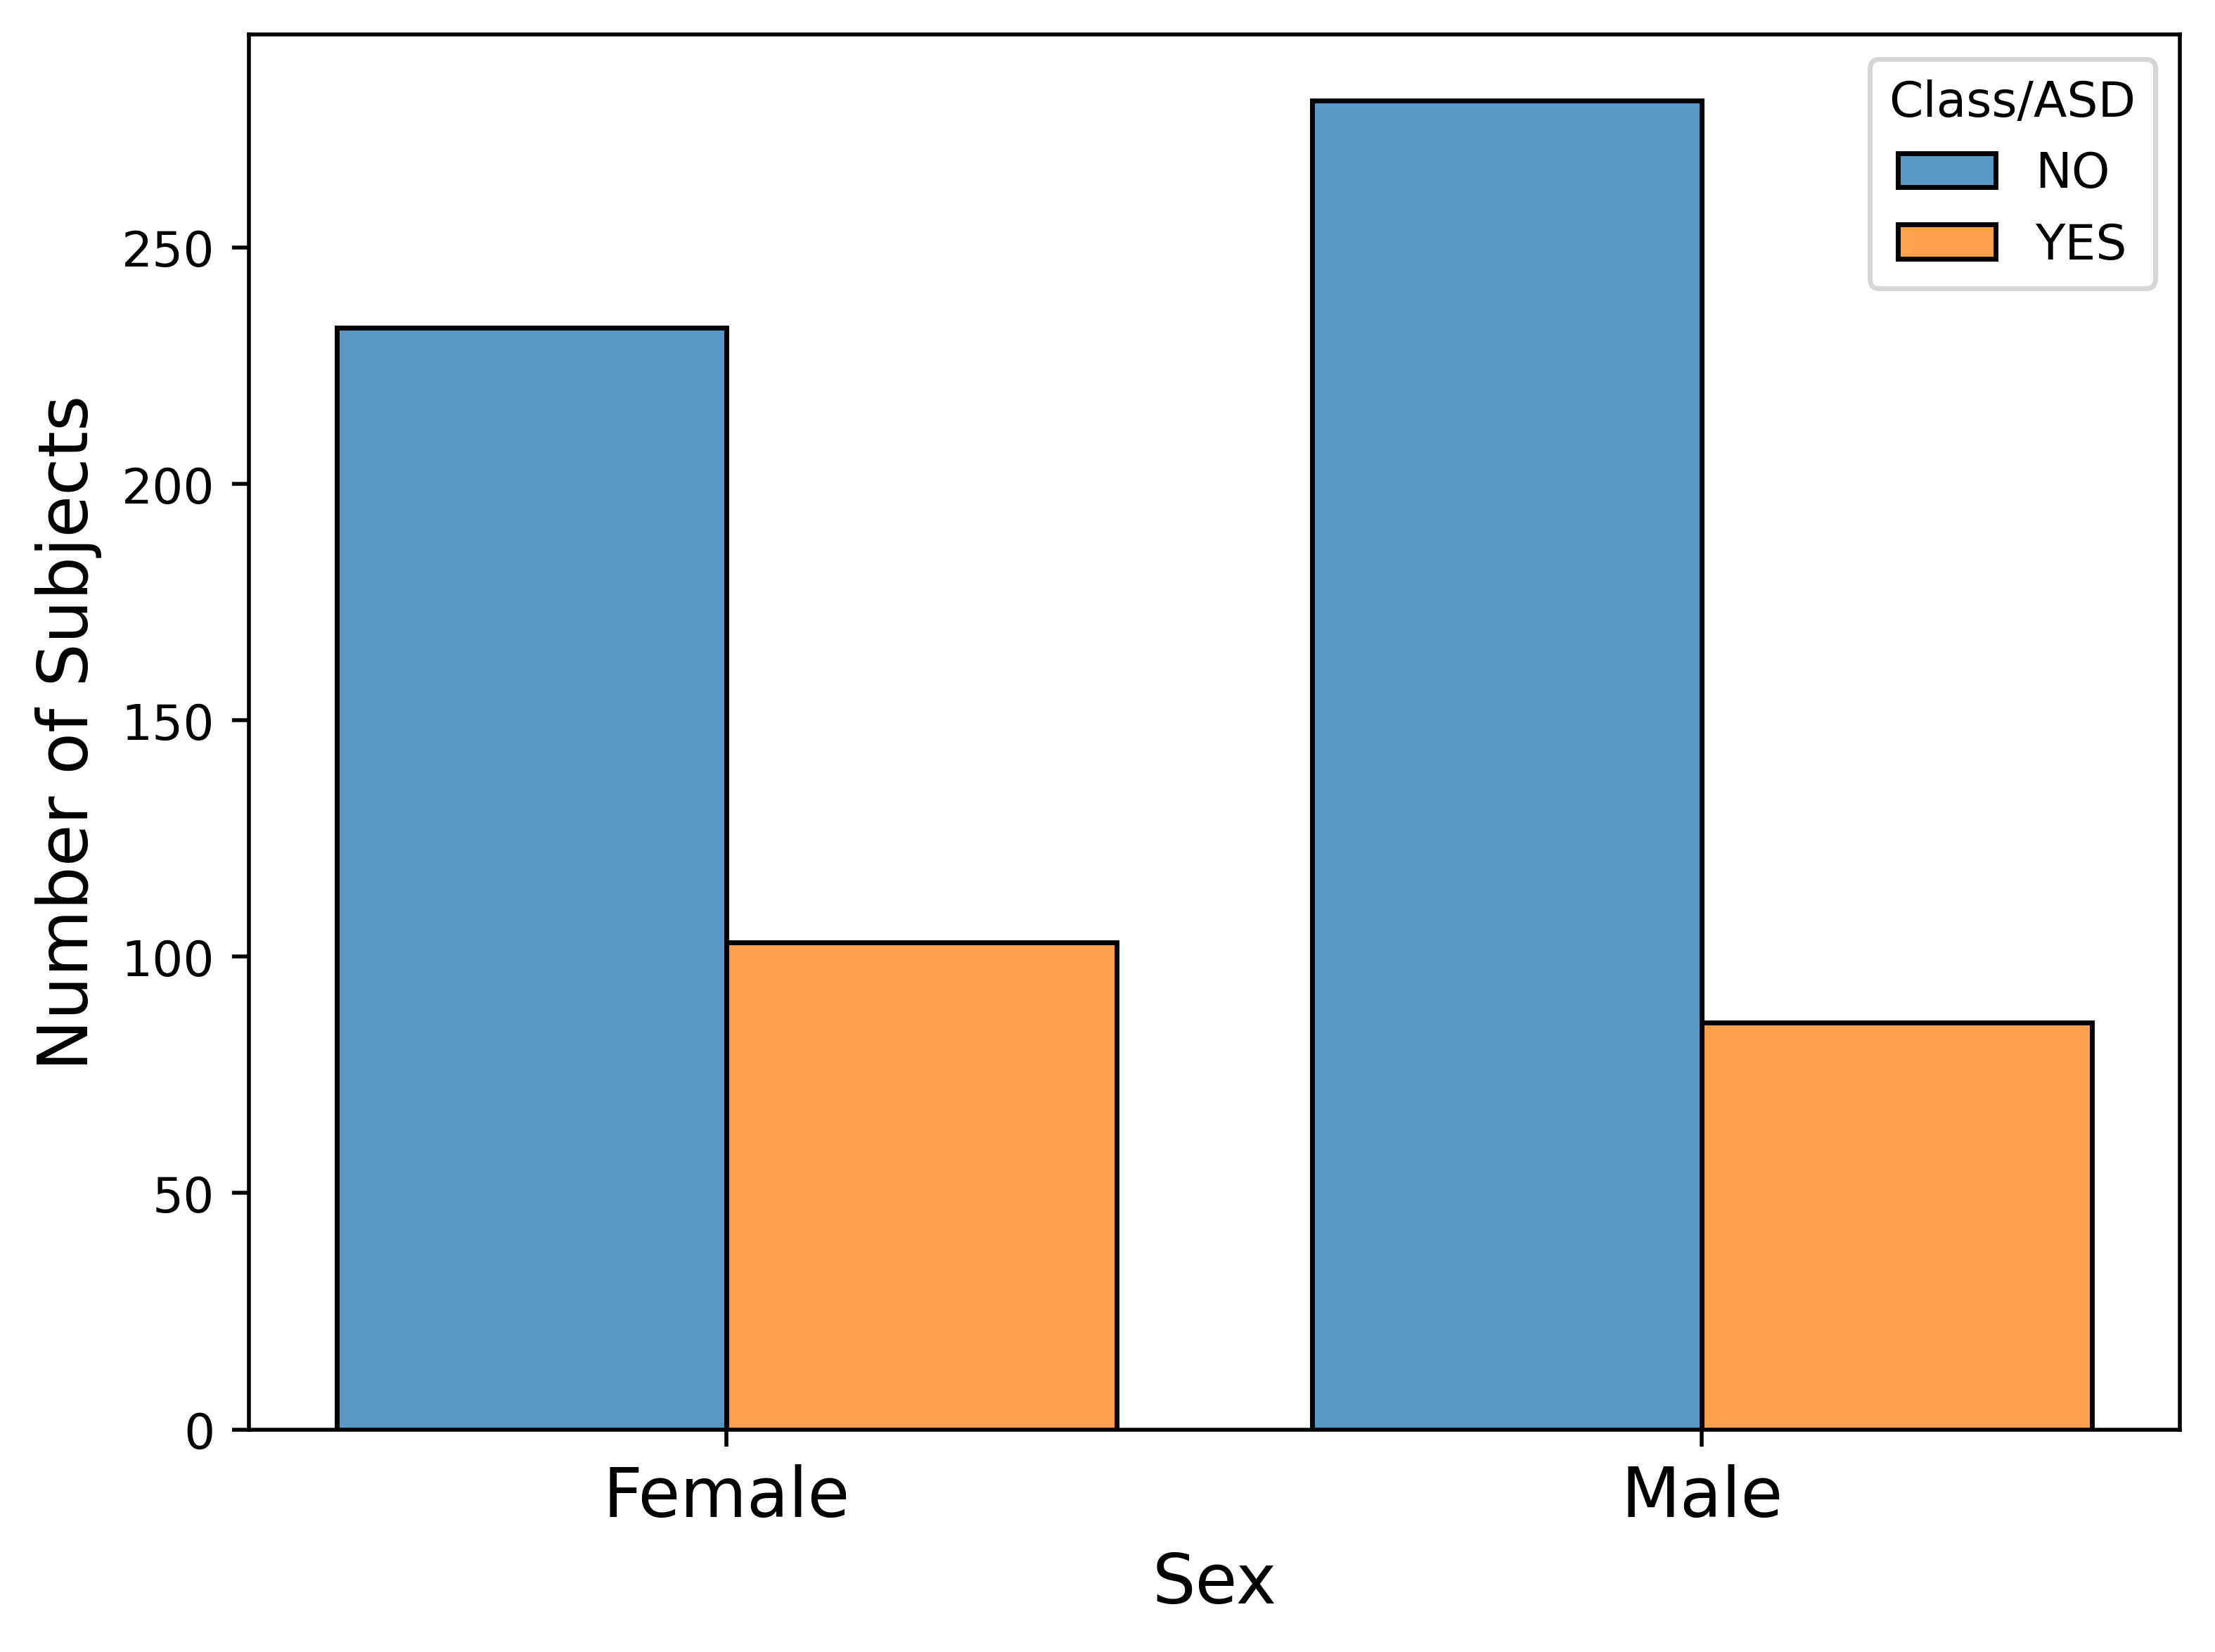

In [9]:
# Count males/females
plt.figure()
ax1 = sns.histplot(data=dataframe, x='gender', hue="Class/ASD", shrink=.8, multiple="dodge")
ax1.set_ylabel("Number of Subjects", fontsize = 14)
ax1.set_xlabel("Sex", fontsize = 14)
ax1.set_xticks([0, 1])
ax1.set_xticklabels(["Female", "Male"], fontsize = 14)

# Which test would you use and why?

## *Null hypothesis*: the frequency of autism is the same across sexes


## Chi-Squared Test

In [10]:
#Chi-Squared Test - Tests whether two categorical variables are related or independent.
print("Null hypothesis: the frequency of autism is the same across sexes.")

females_control = np.sum(len(controls[controls['gender']=='f']))
females_autism = np.sum(len(autism[autism['gender']=='f']))
males_control = np.sum(len(controls[controls['gender']=='m']))
males_autism = np.sum(len(autism[autism['gender']=='m']))

table = [[males_control, males_autism],[females_control, females_autism]]
stat, p, dof, expected = chi2_contingency(table)   
print(f'p-value with Chi-Squared Test: {p:.4f}')
if p < 0.05:
    print("p<0.05 --> we reject the null hypothesis.")
else:
    print("p>0.05 --> we cannot reject the null hypothesis.")
    
# How can we deal with confounding effects?

Null hypothesis: the frequency of autism is the same across sexes.
p-value with Chi-Squared Test: 0.0383
p<0.05 --> we reject the null hypothesis.


## Dealing with confounding effects

- Matching subjects by age and sex (most stringent way) or give interval
- Residualization
- No gold standard

### We will use residualization and remove the effect of age and sex from our input features A1 to A10

In [11]:
# Calculate the mean age that we can use as reference point
mean_age = np.mean(dataframe['age'])

reference_sex = 0

dataframe.gender.replace(('f', 'm'), (0, 1), inplace=True)

# Input features from which we want to remove the effect of age and sex
features_to_residualize = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
                          'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']

for feature in features_to_residualize:
    # endog --> the variable we want to model
    endog = dataframe[feature]
    
    # Intercept/constant --> the mean value of the response variable when all predictor variables 
    # in the model are equal to zero
    dataframe["Intercept"] = 1
    
    # exog --> the covariates alias explanatory variables
    exog = dataframe[["Intercept", "gender", "age"]]
    
    # Generalized linear model
    md = sm.GLM(endog, exog, family=sm.families.Gaussian())

    # Fit the regression model
    md = md.fit()
    print(md.summary())
    # Save the 
    feature_name = feature + '_prime'

    # Calculate residual variables that end in 'prime'
    dataframe[feature_name] = dataframe[feature] - (md.params[1] * (dataframe["gender"] - reference_sex) + 
                                                        md.params[2] * (dataframe["age"] - mean_age))

print('Residualization complete!')

                 Generalized Linear Model Regression Results                  
Dep. Variable:               A1_Score   No. Observations:                  703
Model:                            GLM   Df Residuals:                      700
Model Family:                Gaussian   Df Model:                            2
Link Function:               Identity   Scale:                         0.20082
Method:                          IRLS   Log-Likelihood:                -431.73
Date:                Thu, 19 Oct 2023   Deviance:                       140.57
Time:                        01:22:25   Pearson chi2:                     141.
No. Iterations:                     3   Pseudo R-squ. (CS):           0.005524
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7495      0.057     13.141      0.0

## Save your preprocessed data!

In [12]:
# Save a new file in path data as autism_screening_preprocessed.csv
dataframe.to_csv('data/autism_screening_preprocessed.csv')